In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Assuming the file is in the same directory as your Python script, otherwise provide the full path
# 148604706_Assignment_2.xls the file turnitin.com gives me
file_path = "148604706_Assignment_2.xls" 

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
# print(df.head())
print("Unique submission:",df['Email'].nunique())

Unique submission: 222


Extracting data only for .pdf files, and handling the duplicates:

In [41]:
# Filter rows where the "Title" column contains ".pdf"
pdf_rows = df[df['Title'].str.contains('.pdf', case=False)]

# Identify duplicate emails within pdf_rows
duplicate_emails = pdf_rows[pdf_rows.duplicated(subset='Email', keep=False)]

# Iterate over duplicate emails
for email in duplicate_emails['Email'].unique():
    # Get rows corresponding to the current duplicate email
    email_rows = pdf_rows[pdf_rows['Email'] == email]
    
    # Find the row with the highest value in the "Similarity Score" column
    max_similarity_row_index = email_rows['Similarity Score'].idxmax()
    
    # Drop other rows corresponding to the current duplicate email
    rows_to_drop = email_rows.index.drop(max_similarity_row_index)
    pdf_rows = pdf_rows.drop(rows_to_drop)

# # Verify unique emails again
# unique_emails_count = pdf_rows['Email'].nunique()
# print("Number of unique emails after filtering duplicates:", unique_emails_count)

Adding those who didn't submit .pdf file.

In [42]:
# Create an empty DataFrame to store the rows to be added
rows_to_add = pd.DataFrame(columns=df.columns)
# Find unique email addresses
unique_emails = df['Email'].unique()
# Iterate over unique email addresses
for email in unique_emails:
    # Filter rows for the current email address
    email_rows = df[df['Email'] == email]
    
    # Check if any row for this email contains ".pdf" in the title
    contains_pdf = any(email_rows['Title'].str.contains('.pdf', case=False))
    
    # If no row contains ".pdf" in the title, add a new row to rows_to_add with NaN values
    if not contains_pdf:
        new_row = email_rows.iloc[0].copy()  # Copy the first row for this email
        new_row[['Title', 'Word Count', 'Similarity Score', 'Internet Overlap', 'Publications Overlap', 'Similarity Score']] = np.nan
        rows_to_add = pd.concat([rows_to_add, new_row.to_frame().T], ignore_index=True)


pdf_rows = pd.concat([pdf_rows, rows_to_add], ignore_index=True)

# Print the DataFrame with added rows
# print(pdf_rows)

/tmp/ipykernel_7344/4210676810.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdf_rows = pd.concat([pdf_rows, rows_to_add], ignore_index=True)


/home/pedram/venvs/ann/lib/python3.10/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pedram/venvs/ann/lib/python3.10/site-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


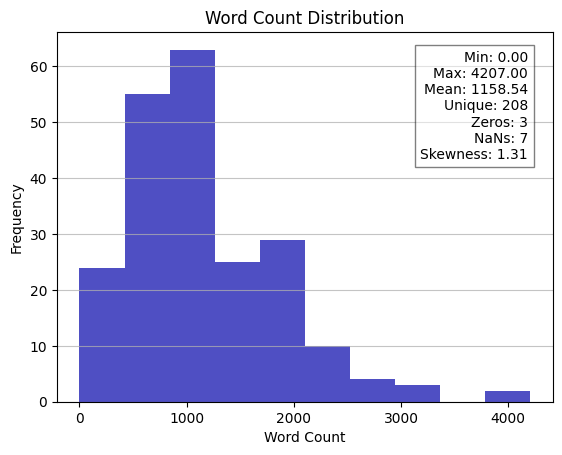

In [43]:
# Plot histogram for Word Count
plt.hist(pdf_rows['Word Count'], color='#0504aa', alpha=0.7)
plt.xlabel('Word Count')

# Additional information
unique_values_count = pdf_rows['Word Count'].nunique()
min_val = pdf_rows['Word Count'].min()
max_val = pdf_rows['Word Count'].max()
mean_val = pdf_rows['Word Count'].mean()
skewness = pdf_rows['Word Count'].skew()
nans_count = pdf_rows['Word Count'].isnull().sum()
zeros_count = (pdf_rows['Word Count'] == 0).sum()

plt.text(0.95, 0.95, f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nUnique: {unique_values_count}\nZeros: {zeros_count}\nNaNs: {nans_count}\nSkewness: {skewness:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('Frequency')
plt.title(f'Word Count Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()


Very left side of above plot is an issue.

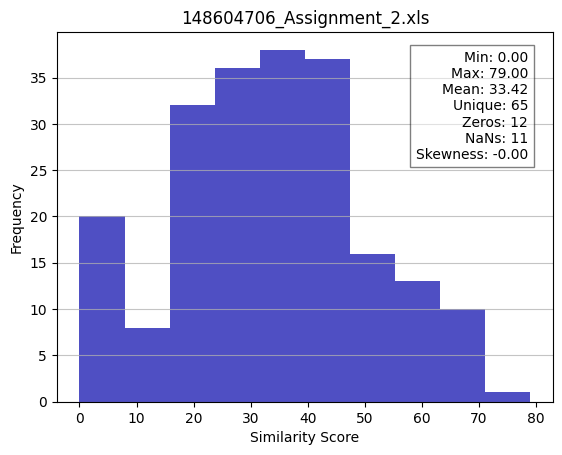

In [20]:
# Plot histogram
plt.hist(pdf_rows['Similarity Score'], color='#0504aa', alpha=0.7)
plt.xlabel('Similarity Score')

# Additional information
unique_values_count = pdf_rows['Similarity Score'].nunique()
min_val = pdf_rows['Similarity Score'].min()
max_val = pdf_rows['Similarity Score'].max()
mean_val = pdf_rows['Similarity Score'].mean()
skewness = pdf_rows['Similarity Score'].skew()
nans_count = pdf_rows['Similarity Score'].isnull().sum()
zeros_count = (pdf_rows['Similarity Score'] == 0).sum()

plt.text(0.95, 0.95, f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nUnique: {unique_values_count}\nZeros: {zeros_count}\nNaNs: {nans_count}\nSkewness: {skewness:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('Frequency')
plt.title(f'{file_path}')
plt.grid(axis='y', alpha=0.75)
plt.show()

Rules on `Similarity Score` column to find **potential** copied course work:

1. Above average similarity
2. Zero or even close to zero% percent similarity means the similarity is not checked
3. nan values means the .pdf doesn't is not submitted
4. Students who did not submit on Avenue or\and submitted by email like late submissions

In [21]:
max_accepted_sim_ass2 = mean_val * 1.1
min_accepted_sim_ass2 = 10


# Calculate the number of students with "Similarity Score" higher than mean*1.2
students_higher_than_mean_1p2 = (pdf_rows['Similarity Score'] > max_accepted_sim_ass2).sum()

# Calculate the number of students with "Similarity Score" less than value 
students_less_than = (pdf_rows['Similarity Score'] < min_accepted_sim_ass2).sum()

# Calculate the number of students with "Similarity Score" which are nan
students_nan_overlap = pdf_rows['Similarity Score'].isnull().sum()

# Print the results
print(f"Number of students with overlap higher than {max_accepted_sim_ass2:.2f}%", students_higher_than_mean_1p2)
print(f"Number of students with overlap less than {min_accepted_sim_ass2:0.2f}%:", students_less_than)
print("Number of students with nan overlap:", students_nan_overlap)

# Define the conditions
condition_1 = pdf_rows['Similarity Score'] > max_accepted_sim_ass2
condition_2 = pdf_rows['Similarity Score'] < min_accepted_sim_ass2
condition_3 = pdf_rows['Similarity Score'].isnull()

# Filter the rows based on the conditions
pdf_rows_suspicious2 = pdf_rows[condition_1 | condition_2 | condition_3]

# Print the new DataFrame
# print(pdf_rows_suspicious2)

Number of students with overlap higher than 36.76% 94
Number of students with overlap less than 10.00%: 20
Number of students with nan overlap: 11


In [45]:
# Assuming the file is in the same directory as your Python script, otherwise provide the full path
# 148604706_Assignment_2.xls the file turnitin.com gives me
file_path = "149717228_Assignment_3.xls" 

# Read the Excel file into a DataFrame
df3 = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
# print(df3.head())
print("Unique submission:",df3['Email'].nunique())

# Filter rows where the "Title" column contains ".pdf"
pdf_rows3 = df3[df3['Title'].str.contains('.pdf', case=False)]

# Identify duplicate emails within pdf_rows3
duplicate_emails = pdf_rows3[pdf_rows3.duplicated(subset='Email', keep=False)]

# Iterate over duplicate emails
for email in duplicate_emails['Email'].unique():
    # Get rows corresponding to the current duplicate email
    email_rows = pdf_rows3[pdf_rows3['Email'] == email]
    
    # Find the row with the highest value in the "Similarity Score" column
    max_similarity_row_index = email_rows['Similarity Score'].idxmax()
    
    # Drop other rows corresponding to the current duplicate email
    rows_to_drop = email_rows.index.drop(max_similarity_row_index)
    pdf_rows3 = pdf_rows3.drop(rows_to_drop)

Unique submission: 221


/home/pedram/venvs/ann/lib/python3.10/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pedram/venvs/ann/lib/python3.10/site-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


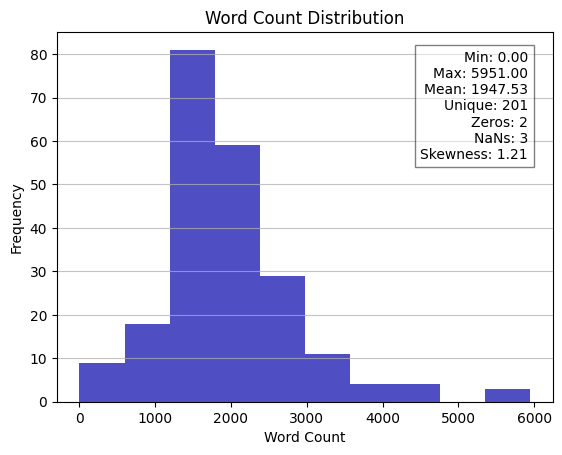

In [46]:
# Create an empty DataFrame to store the rows to be added
rows_to_add = pd.DataFrame(columns=df3.columns)
# Find unique email addresses
unique_emails = df3['Email'].unique()
# Iterate over unique email addresses
for email in unique_emails:
    # Filter rows for the current email address
    email_rows = df3[df3['Email'] == email]
    
    # Check if any row for this email contains ".pdf" in the title
    contains_pdf3 = any(email_rows['Title'].str.contains('.pdf', case=False))
    
    # If no row contains ".pdf" in the title, add a new row to rows_to_add with NaN values
    if not contains_pdf3:
        new_row = email_rows.iloc[0].copy()  # Copy the first row for this email
        new_row[['Title', 'Word Count', 'Similarity Score', 'Internet Overlap', 'Publications Overlap', 'Similarity Score']] = np.nan
        rows_to_add = pd.concat([rows_to_add, new_row.to_frame().T], ignore_index=True)

pdf_rows3 = pd.concat([pdf_rows3, rows_to_add], ignore_index=True)

# Plot histogram for Word Count
plt.hist(pdf_rows3['Word Count'], color='#0504aa', alpha=0.7)
plt.xlabel('Word Count')

# Additional information
unique_values_count = pdf_rows3['Word Count'].nunique()
min_val = pdf_rows3['Word Count'].min()
max_val = pdf_rows3['Word Count'].max()
mean_val = pdf_rows3['Word Count'].mean()
skewness = pdf_rows3['Word Count'].skew()
nans_count = pdf_rows3['Word Count'].isnull().sum()
zeros_count = (pdf_rows3['Word Count'] == 0).sum()

plt.text(0.95, 0.95, f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nUnique: {unique_values_count}\nZeros: {zeros_count}\nNaNs: {nans_count}\nSkewness: {skewness:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('Frequency')
plt.title(f'Word Count Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

Close to zero is a problem.

In [ ]:

# Print the DataFrame with added rows
# print(pdf_rows)

# Plot histogram
plt.hist(pdf_rows3['Similarity Score'], color='#0504aa', alpha=0.7)
plt.xlabel('Similarity Score')

# Additional information
unique_values_count = pdf_rows3['Similarity Score'].nunique()
min_val = pdf_rows3['Similarity Score'].min()
max_val = pdf_rows3['Similarity Score'].max()
mean_val = pdf_rows3['Similarity Score'].mean()
skewness = pdf_rows3['Similarity Score'].skew()
nans_count = pdf_rows3['Similarity Score'].isnull().sum()
zeros_count = (pdf_rows3['Similarity Score'] == 0).sum()

plt.text(0.95, 0.95, f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nUnique: {unique_values_count}\nZeros: {zeros_count}\nNaNs: {nans_count}\nSkewness: {skewness:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('Frequency')
plt.title(f'{file_path}')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [23]:
max_accepted_sim_ass3 = mean_val * 1.05
min_accepted_sim_ass3 = 18

# Calculate the number of students with "Similarity Score" higher than mean*1.2
students_higher_than_mean_1p2 = (pdf_rows3['Similarity Score'] > max_accepted_sim_ass3).sum()

# Calculate the number of students with "Similarity Score" less than value 18
students_less_than_10 = (pdf_rows3['Similarity Score'] < min_accepted_sim_ass3).sum()

# Calculate the number of students with "Similarity Score" which are nan
students_nan_overlap = pdf_rows3['Similarity Score'].isnull().sum()

# Print the results
print(f"Number of students with overlap higher than {max_accepted_sim_ass3:.2f}%", students_higher_than_mean_1p2)
print(f"Number of students with overlap less than {min_accepted_sim_ass3:0.2f}%:", students_less_than)
print("Number of students with nan overlap:", students_nan_overlap)


# Define the conditions
condition_1 = pdf_rows3['Similarity Score'] > max_accepted_sim_ass3
condition_2 = pdf_rows3['Similarity Score'] < min_accepted_sim_ass3
condition_3 = pdf_rows3['Similarity Score'].isnull()

# Filter the rows based on the conditions
pdf_rows3_suspicious3 = pdf_rows3[condition_1 | condition_2 | condition_3]

# Print the new DataFrame
# print(pdf_rows_suspicious3)

Number of students with overlap higher than 51.69% 94
Number of students with overlap less than 18.00%: 20
Number of students with nan overlap: 10


In [24]:
# Merge pdf_rows3_suspicious3 and pdf_rows_suspicious2 on Last Name, First Name, and Email
merged_df = pd.merge(pdf_rows3_suspicious3[['Last Name', 'First Name', 'Email']], 
                     pdf_rows_suspicious2[['Last Name', 'First Name', 'Email']], 
                     on=['Last Name', 'First Name', 'Email'], 
                     how='inner')

# Rename the DataFrame to repeated_names
repeated_names23 = merged_df

# Print the new DataFrame
# print(repeated_names)


In [25]:
# Assuming you want to save the file as "repeated_names.xlsx"
output_file_path = "repeated_name23.xlsx"

# Save the DataFrame to an Excel file
repeated_names23.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to repeated_name23.xlsx


In [48]:
# Assuming the file is in the same directory as your Python script, otherwise provide the full path
# 148604706_Assignment_2.xls the file turnitin.com gives me
file_path = "150101266_Assignment_4.xls" 

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
# print(df.head())
print("Unique submission:",df['Email'].nunique())

Unique submission: 220


In [49]:
# Filter rows where the "Title" column contains ".pdf"
pdf_rows = df[df['Title'].str.contains('.pdf', case=False)]

# Identify duplicate emails within pdf_rows
duplicate_emails = pdf_rows[pdf_rows.duplicated(subset='Email', keep=False)]

# Iterate over duplicate emails
for email in duplicate_emails['Email'].unique():
    # Get rows corresponding to the current duplicate email
    email_rows = pdf_rows[pdf_rows['Email'] == email]
    
    # Find the row with the highest value in the "Similarity Score" column
    max_similarity_row_index = email_rows['Similarity Score'].idxmax()
    
    # Drop other rows corresponding to the current duplicate email
    rows_to_drop = email_rows.index.drop(max_similarity_row_index)
    pdf_rows = pdf_rows.drop(rows_to_drop)

# # Verify unique emails again
# unique_emails_count = pdf_rows['Email'].nunique()
# print("Number of unique emails after filtering duplicates:", unique_emails_count)

In [50]:
# Create an empty DataFrame to store the rows to be added
rows_to_add = pd.DataFrame(columns=df.columns)
# Find unique email addresses
unique_emails = df['Email'].unique()
# Iterate over unique email addresses
for email in unique_emails:
    # Filter rows for the current email address
    email_rows = df[df['Email'] == email]
    
    # Check if any row for this email contains ".pdf" in the title
    contains_pdf = any(email_rows['Title'].str.contains('.pdf', case=False))
    
    # If no row contains ".pdf" in the title, add a new row to rows_to_add with NaN values
    if not contains_pdf:
        new_row = email_rows.iloc[0].copy()  # Copy the first row for this email
        new_row[['Title', 'Word Count', 'Similarity Score', 'Internet Overlap', 'Publications Overlap', 'Similarity Score']] = np.nan
        rows_to_add = pd.concat([rows_to_add, new_row.to_frame().T], ignore_index=True)


pdf_rows = pd.concat([pdf_rows, rows_to_add], ignore_index=True)

# Print the DataFrame with added rows
# print(pdf_rows)

/home/pedram/venvs/ann/lib/python3.10/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pedram/venvs/ann/lib/python3.10/site-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


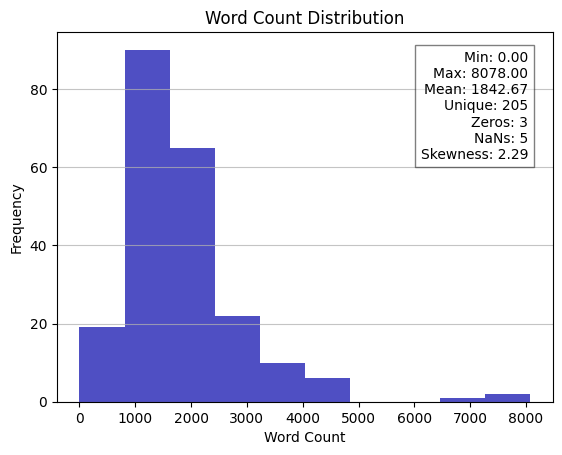

In [51]:
# Plot histogram for Word Count
plt.hist(pdf_rows['Word Count'], color='#0504aa', alpha=0.7)
plt.xlabel('Word Count')

# Additional information
unique_values_count = pdf_rows['Word Count'].nunique()
min_val = pdf_rows['Word Count'].min()
max_val = pdf_rows['Word Count'].max()
mean_val = pdf_rows['Word Count'].mean()
skewness = pdf_rows['Word Count'].skew()
nans_count = pdf_rows['Word Count'].isnull().sum()
zeros_count = (pdf_rows['Word Count'] == 0).sum()

plt.text(0.95, 0.95, f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nUnique: {unique_values_count}\nZeros: {zeros_count}\nNaNs: {nans_count}\nSkewness: {skewness:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('Frequency')
plt.title(f'Word Count Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()


Very close to zero and very right is an issue.

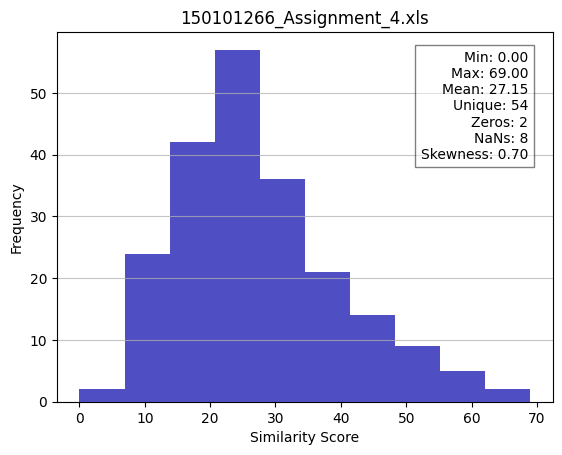

In [52]:
# Plot histogram
plt.hist(pdf_rows['Similarity Score'], color='#0504aa', alpha=0.7)
plt.xlabel('Similarity Score')

# Additional information
unique_values_count = pdf_rows['Similarity Score'].nunique()
min_val = pdf_rows['Similarity Score'].min()
max_val = pdf_rows['Similarity Score'].max()
mean_val = pdf_rows['Similarity Score'].mean()
skewness = pdf_rows['Similarity Score'].skew()
nans_count = pdf_rows['Similarity Score'].isnull().sum()
zeros_count = (pdf_rows['Similarity Score'] == 0).sum()

plt.text(0.95, 0.95, f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nUnique: {unique_values_count}\nZeros: {zeros_count}\nNaNs: {nans_count}\nSkewness: {skewness:.2f}',
         verticalalignment='top', horizontalalignment='right',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.ylabel('Frequency')
plt.title(f'{file_path}')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [53]:
max_accepted_sim_ass2 = mean_val * 1.2
min_accepted_sim_ass2 = 7


# Calculate the number of students with "Similarity Score" higher than mean*1.2
students_higher_than_mean_1p2 = (pdf_rows['Similarity Score'] > max_accepted_sim_ass2).sum()

# Calculate the number of students with "Similarity Score" less than value 
students_less_than = (pdf_rows['Similarity Score'] < min_accepted_sim_ass2).sum()

# Calculate the number of students with "Similarity Score" which are nan
students_nan_overlap = pdf_rows['Similarity Score'].isnull().sum()

# Print the results
print(f"Number of students with overlap higher than {max_accepted_sim_ass2:.2f}%", students_higher_than_mean_1p2)
print(f"Number of students with overlap less than {min_accepted_sim_ass2:0.2f}%:", students_less_than)
print("Number of students with nan overlap:", students_nan_overlap)

# Define the conditions
condition_1 = pdf_rows['Similarity Score'] > max_accepted_sim_ass2
condition_2 = pdf_rows['Similarity Score'] < min_accepted_sim_ass2
condition_3 = pdf_rows['Similarity Score'].isnull()

# Filter the rows based on the conditions
pdf_rows_suspicious4 = pdf_rows[condition_1 | condition_2 | condition_3]

# Print the new DataFrame
# print(pdf_rows_suspicious3)

Number of students with overlap higher than 32.58% 59
Number of students with overlap less than 7.00%: 2
Number of students with nan overlap: 8


In [54]:
# Merge pdf_rows3_suspicious3 and pdf_rows3_suspicious2 on Last Name, First Name, and Email
merged_df1 = pd.merge(pdf_rows3_suspicious3[['Last Name', 'First Name', 'Email']], 
                      pdf_rows_suspicious2[['Last Name', 'First Name', 'Email']], 
                      on=['Last Name', 'First Name', 'Email'], 
                      how='inner')

# Merge pdf_rows3_suspicious3 and pdf_rows3_suspicious4 on Last Name, First Name, and Email
merged_df2 = pd.merge(pdf_rows3_suspicious3[['Last Name', 'First Name', 'Email']], 
                      pdf_rows_suspicious4[['Last Name', 'First Name', 'Email']], 
                      on=['Last Name', 'First Name', 'Email'], 
                      how='inner')

# Merge merged_df1 and merged_df2 to find intersection of repeated names across all three DataFrames
repeated_names234 = pd.merge(merged_df1, 
                          merged_df2, 
                          on=['Last Name', 'First Name', 'Email'], 
                          how='inner')

# Display the repeated_names DataFrame
# print(repeated_names234)

In [55]:
# Assuming you want to save the file as "repeated_names.xlsx"
output_file_path = "repeated_name234.xlsx"

# Save the DataFrame to an Excel file
repeated_names234.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to repeated_name234.xlsx


In [56]:
# Merge pdf_rows3_suspicious3 and pdf_rows3_suspicious2 on Last Name, First Name, and Email
merged_df34 = pd.merge(pdf_rows3_suspicious3[['Last Name', 'First Name', 'Email']], 
                      pdf_rows_suspicious4[['Last Name', 'First Name', 'Email']], 
                      on=['Last Name', 'First Name', 'Email'], 
                      how='inner')



# Display the repeated_names DataFrame
# print(merged_df34)

In [57]:
# Assuming you want to save the file as "repeated_names.xlsx"
output_file_path = "repeated_name34.xlsx"

# Save the DataFrame to an Excel file
merged_df34.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to repeated_name34.xlsx


In [58]:
# Combine merged_df34 and repeated_names234
combined_df = pd.concat([merged_df34, repeated_names234])

# Remove duplicated rows
combined_df = combined_df.drop_duplicates()

# Display the combined and deduplicated DataFrame
# print(combined_df)


In [37]:
# Assuming you want to save the file as "repeated_names.xlsx"
output_file_path = "combined_df234-34.xlsx"

# Save the DataFrame to an Excel file
combined_df.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to combined_df234-34.xlsx
